# Exercise 2

In [231]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math
#import ipympl

## Task 1

### Utility functions

In [207]:
def field_vector(coords:np.array) -> np.array:
    '''
    Takes x, y, z coordinates and returns a field vector
    '''
    x,y,z = coords
    sig: int = 10
    ro: int = 28
    bet: float = 8/3
    return np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])

In [208]:
def tent_map_iterator(gt: np.array, a: float) -> np.array:
    '''
    Takes gn and performs tent map iteration for calculating gn+1 error
    '''
    return np.array([1.99999*g + a/2 if g >= -a/2 and g < 0 else -1.99999*g + a/2 for g in gt])

In [209]:
def lorrenz_attractor(Z_t: np.array,dt: float,t: int):
    '''
    Takes initial co-ordinates and simulate a lorrenz attractor with dt time interval and t observations
    '''
    iterations = int(t/dt)
    a = 1/np.sqrt(dt)
    g1 = a*(1/np.sqrt(2) - 1/2)
    g2 = a*(1/np.sqrt(3) - 1/2)
    g3 = a*(1/np.sqrt(5) - 1/2)
    gt = np.array([g1, g2, g3])

    f_z = field_vector(Z_t)
    X_cord = [Z_ini[0],]
    Y_cord = [Z_ini[1],]
    Z_cord = [Z_ini[2],]
    Z_t = np.array(Z_t)
    for i in range(iterations):
        
        # Calculating Z_t+1
        Z_new = Z_t + dt*(f_z+gt)
        
        # Updating gt to gt+1
        gt = tent_map_iterator(gt,a)
        
        # Getting new coordinates and appending to a list
        x,y,z = Z_new
        X_cord.append(x)
        Y_cord.append(y)
        Z_cord.append(z)
        
        # Updating the field vector and the states of the Z_vector
        f_z = field_vector(Z_new)
        Z_t = Z_new
    return [X_cord,Y_cord,Z_cord]

### Plotting the Lorrenz Attractor

In [322]:
### Initializing params
Z_ini: np.array = np.array([-0.587,-0.563,16.870])
dt: float = 0.001
N: int = int(2e5)
tn: int = N*dt # Number of points that we want to generate per dt interval

# Getting all lorrenz attractor coordinates
Z_ref: list = lorrenz_attractor(Z_ini,dt,tn)

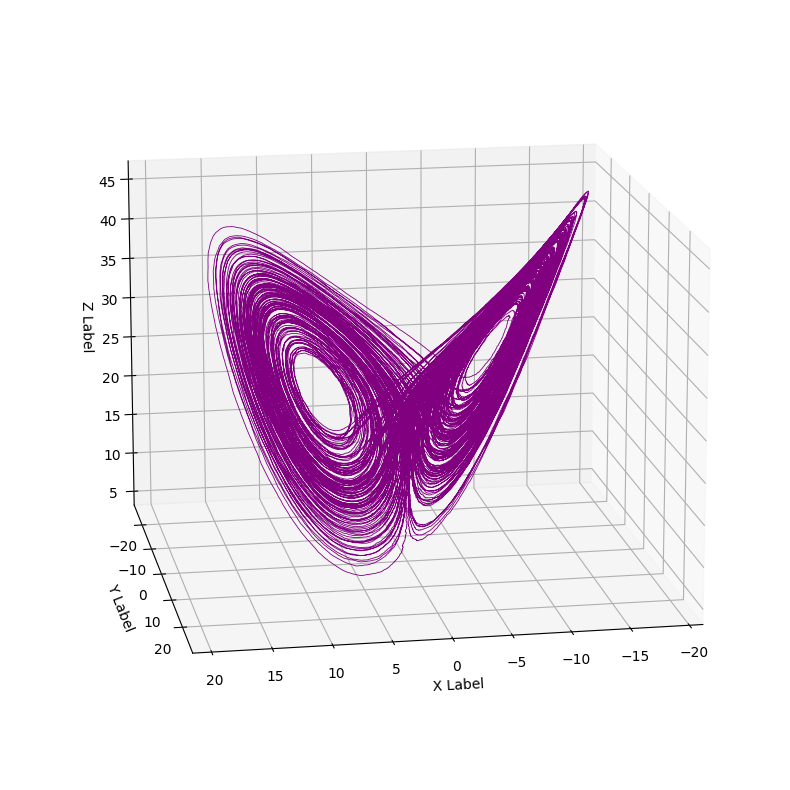

In [335]:
# Generating the plot
x,y,z = Z_ref[0],Z_ref[1],Z_ref[2]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, color = 'purple', lw = 0.6)
ax.view_init(15,80)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [237]:
### We are only interested in every 50th point from Z_ref, that becomes our observation. So in all we have 4000 points.
Z_out = []
for i in range(0,len(Z_ref[0]),50):
    Z_out.append(Z_ref[:,i])

In [254]:
ref_trajectory= pd.DataFrame(Z_out).transpose()
ref_trajectory.to_csv("ysd_ref.csv",index = False)

In [337]:
len(Z_out)

4001

## Task 2

In [ ]:
# def measurement_error(iterate_cf:int,eta_0: float, a: int,err_ch:int) -> float:
#     '''
#     Takes gn and performs tent map iteration for calculating gn+1 error
#     '''
#     measurement_error: float = 0.0
#     begin = iterate_cf-19
#     end = iterate_cf+1
#     factor = 1.99999 if err_ch == 1 else 2
#     for index in range(begin,end):
#         eta_t = eta_0
#         for i in range(10*index):
#             eta_t = 1.99999*eta_t + a/2 if eta_t >= -a/2 and eta_t < 0 else -1.99999*eta_t + a/2
#         measurement_error+=eta_t
#     return measurement_error

def h_map(Z_ref: np.array) -> list:
    return list(Z_ref.iloc[0,:])

In [353]:
def measurement_errors(eta_0,a):
    err = [eta_0]
    eta_t = eta_0
    for i in range(40000):
        eta_t = 1.99999*eta_t + a/2 if eta_t >= -a/2 and eta_t < 0 else -1.99999*eta_t + a/2
        if i%10 == 0:
            err.append(eta_t)
    summ_err = [eta_0,]
    for i in range(200):
        summ_err.append(sum(err[(i+1)*20-19:(i+1)*20])/20)
        
    return summ_err

In [354]:
def x_obs(x_ref: list,N: int,err_ch:int):
    a:int = 4
    eta_0:float = a*(1/np.sqrt(2) - 1/2)
    m_e = measurement_errors(eta_0,a)
    #m_e = [eta_0]
    X_obs = [x_ref[0],]
    for i in range(1,N+1):
        #iterate_cf = i*20
        #m_e.append(1/20*(measurement_error(iterate_cf,eta_0,a,err_ch)))
        # Calculating x_obs
        val = x_ref[i] + m_e[i]
        X_obs.append(val) 
        
    return X_obs,m_e

In [355]:
z_ref: list = pd.read_csv("./ysd_ref.csv")
z_ref

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,-0.587,-0.622950,-0.761366,-1.102291,-1.601155,-2.439638,-3.764031,-5.774209,-8.839534,-12.811610,...,5.558479,6.434814,7.766756,9.411535,10.915136,11.813859,11.500384,10.057197,8.122559,6.349900
1,-0.563,-0.875337,-1.236818,-1.827151,-2.888209,-4.578262,-7.087303,-10.947681,-16.237608,-21.120972,...,6.996159,8.655589,10.800843,12.711488,13.498843,12.469222,9.624748,6.328312,4.235632,3.397472
2,16.870,14.781960,12.929246,11.391491,10.119416,9.336191,8.914896,9.880252,13.325053,21.303606,...,20.947835,20.474812,21.205639,23.364185,26.700449,30.511308,32.859467,32.813541,30.949374,28.366168


In [356]:
### Initializing params
Z_ini: np.array = np.array([-0.587,-0.563,16.870])
dt: float = 0.001
t: int = 200

# Getting all lorrenz attractor coordinates
z_ref: list = pd.read_csv("./ysd_ref.csv")

x_ref = h_map(z_ref)

#### First 200 Observations with tentmap having multi_factor = 2

In [357]:
N = 200
observed_x,errors = x_obs(x_ref,N,0)

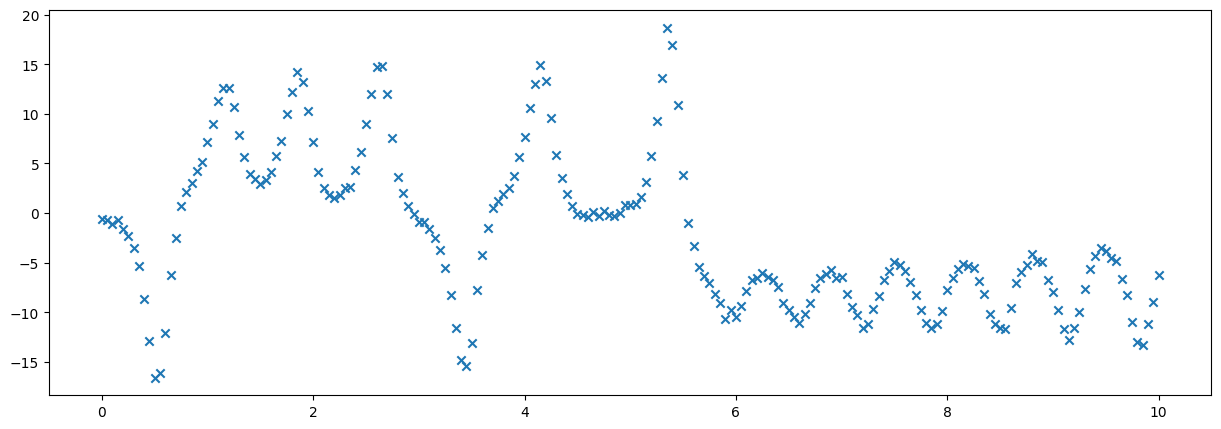

In [358]:
plt.figure(figsize=(15,5))
plt.scatter([i*t_out for i in range(len(observed_x))], observed_x, marker="x")
plt.show()

In [359]:
observed_pd = pd.DataFrame(observed_x)
observed_pd.to_csv("ysd_x_TH_obs.csv",index = False)

In [360]:
observed_pd

,0
0,-0.587000
1,-0.670593
2,-1.126657
3,-0.740117
4,-1.600469
...,...
196,-13.005976
197,-13.299798
198,-11.149713
199,-8.935913


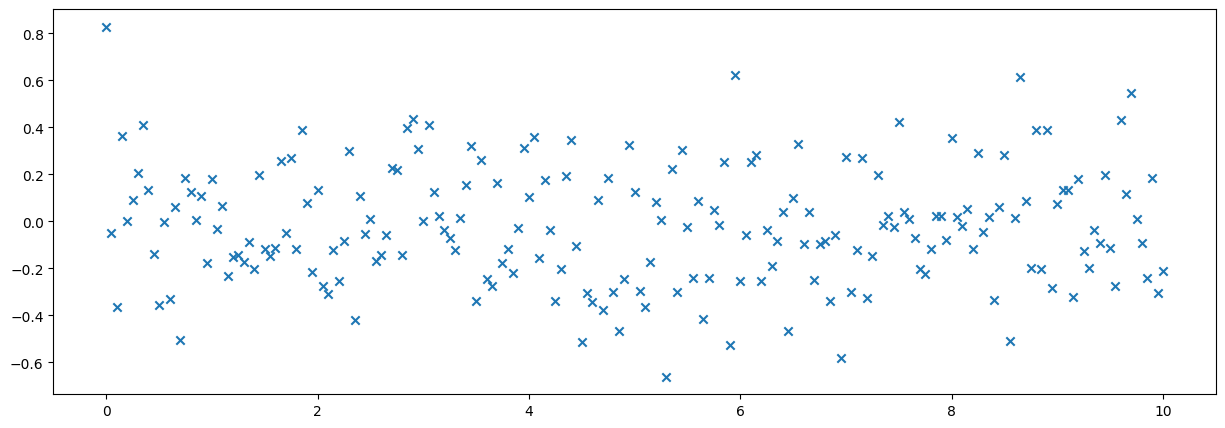

In [361]:
plt.figure(figsize=(15,5))
plt.scatter([i*t_out for i in range(len(errors))], errors, marker="x")
plt.show()

#### First 200 Observations with tentmap having multi_factor = 1.99999

In [362]:
N = 200
observed_x,errors = x_obs(x_ref,N,1)

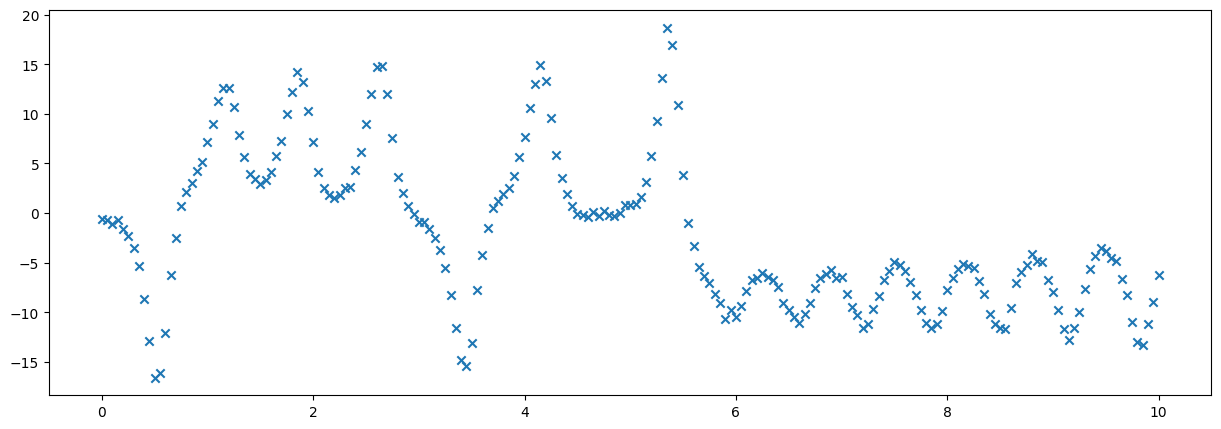

In [363]:
plt.figure(figsize=(15,5))
plt.scatter([i*t_out for i in range(len(observed_x))], observed_x, marker="x")
plt.show()

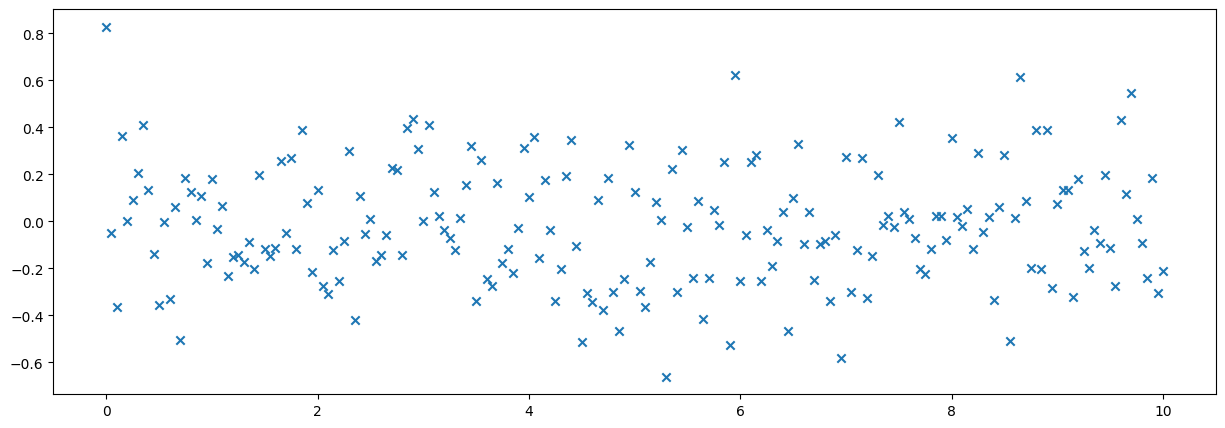

In [364]:
plt.figure(figsize=(15,5))
plt.scatter([i*t_out for i in range(len(errors))], errors, marker="x")
plt.show()

## Task 3

In [365]:
### Initializing params
Z_ini: np.array = np.array([-0.587,-0.563,16.870])
dt: float = 0.001
t: int = 200
# This gives us 2e5 reference points, using only every 50th ref, leaves us with 4000 points in total 200 time intervals.
# We will be using the first 100 time intervals to interpolate our polynomial and make predictions for the rest interval.
# Thus we will be making predictions from 2001 point onwards.

# Getting all lorrenz attractor coordinates
z_ref: list = pd.read_csv("./ysd_ref.csv")

x_ref = h_map(z_ref)

In [366]:
N = 4000 #Getting all the observations 
observed_x,errors = x_obs(x_ref,N,1)

IndexError: list index out of range